In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re

%config InlineBackend.figure_format = 'retina'

In [2]:
pd.set_option('display.max_columns', 500)

In [38]:
df = pd.read_csv('../../GoFundMe/data/gofundme_projects_new.csv')

In [42]:
df.iloc[19, :]

url                  https://www.gofundme.com/peter-strands-fight-a...
name                                Peter Strands Fight Against Cancer
location                                                      RENO, NV
launched                                                    2019-01-21
month                                                                1
year                                                              2019
usd_pledged                                                      36456
goal                                                             35000
backers                                                            253
mean_donation                                                  144.095
text_length_words                                                  432
photos                                                               6
updates                                                              8
comments                                                             0
shares

In [2]:
hour = re.compile(r'^(\d{1,2}) hour(?:s?)$')
day = re.compile(r'^(\d{1,2}) day(?:s?)$')
month = re.compile(r'^(\d{1,2}) month(?:s?)$')

def durtnum(dur):
    hour_s = hour.search(dur)
    if hour_s:
        return float(hour_s.group(1)) / 24
    
    day_s = day.search(dur)
    if day_s:
        return int(day_s.group(1))
    
    month_s = month.search(dur)
    if month_s:
        return int(month_s.group(1)) * 30
    
    return np.nan

In [24]:
import hashlib

'5d41402abc4b2a76b9719d911017c592'

In [27]:
df = pd.read_csv('../../GoFundMe/data/projects.csv').dropna()

df['duration'] = df['duration'].apply(durtnum)

df['id'] = df['url'].apply(lambda u: hashlib.md5(str.encode(u)).hexdigest())

df.to_csv('../data/processed/gfm_projects.csv', index=False)

print(len(df))
df.sample(5)

1011


,url,name,location,launched,month,year,amt_raised,goal,backers,mean_donation,text_length_words,duration,text,id
521,https://www.gofundme.com/felicity-simon-fight-...,Felicity & Simon fight Brain Cancer,"Nhulunbuy, NT",2017-06-13,6.0,2017.0,97618.0,100000.0,1149.0,84.959095,474.0,570.0,Felicity is a 33 year old mother of 5 and she ...,3205a7f99a672bf34b8f5e6e0ed00211
29,https://www.gofundme.com/june-carpenter-teache...,June Carpenter - Teacher- Stage 4 Cancer,"AUGUSTA, ME",2019-01-21,1.0,2019.0,6904.0,10000.0,104.0,66.384615,141.0,4.0,Please help our wonderful friend. June is a 4...,3eb2f8097ebb747bcc9650b2adb93504
1001,https://www.gofundme.com/kill-the-cancer-keep-...,Help a Former Navy SEAL Beat Cancer,"PACIFICA, CA",2018-08-14,8.0,2018.0,12369.0,18000.0,80.0,154.612500,640.0,150.0,"Ah, the “C” word. (Not that C word, although t...",cdc71db5b9e8c9c67e41824c2564ecce
339,https://www.gofundme.com/zuvfke-help-charlie-b...,Help Charlie Beat Cancer,"JACKSONVILLE, FL",2018-10-06,10.0,2018.0,4560.0,10000.0,48.0,95.000000,328.0,90.0,"For those of you that know Charlie, you know t...",f6402e9351bb3d9d5b4698f13f4c9f15
303,https://www.gofundme.com/melissajoypowell,Melissa’s Breast Cancer Journey #melissastrong,"Binbrook, ON",2019-01-19,1.0,2019.0,5190.0,20000.0,44.0,117.954545,471.0,7.0,This is our beautiful sister Melissa. As some...,35f8c47e89cd1b8a021cccc11fbe2718


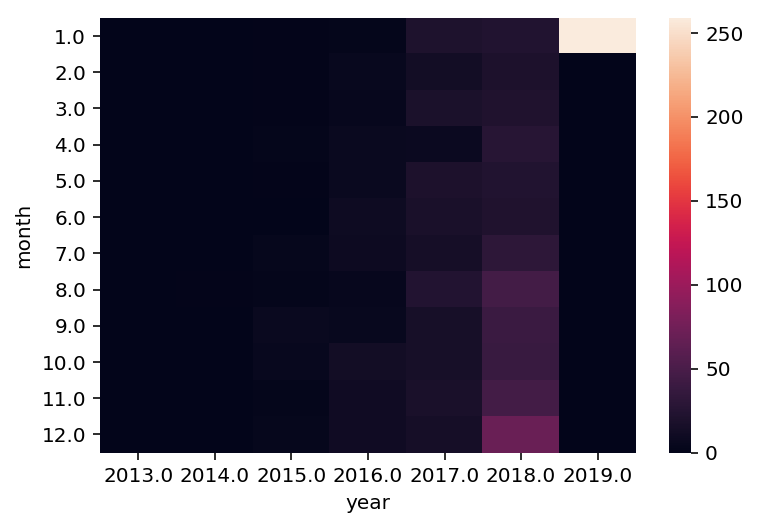

In [4]:
sns.heatmap(df.groupby(['month', 'year'])['url'].count().unstack().fillna(0))

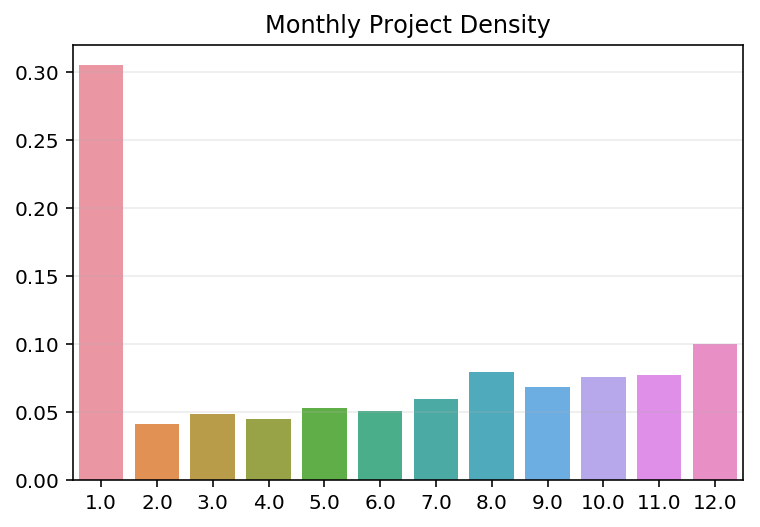

In [5]:
vc = df['month'].value_counts() / len(df)
sns.barplot(vc.index, vc.values)
plt.grid(alpha=0.25, axis='y')
plt.title('Monthly Project Density');

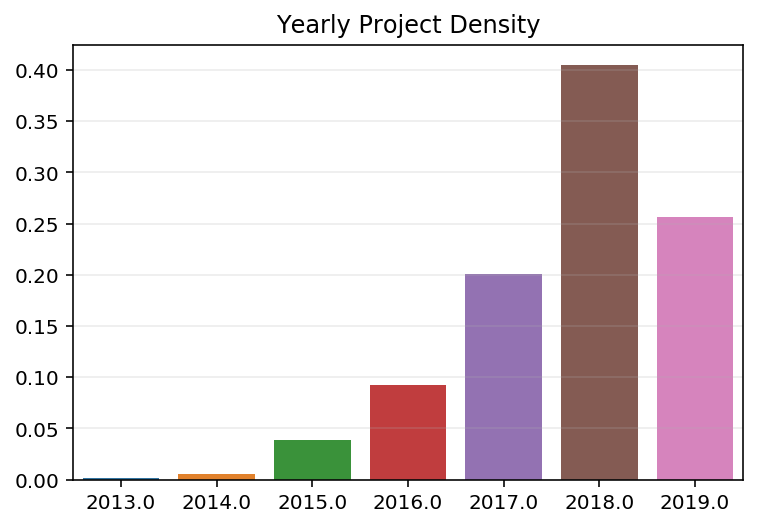

In [6]:
vc = df['year'].value_counts() / len(df)
sns.barplot(vc.index, vc.values)
plt.grid(alpha=0.25, axis='y')
plt.title('Yearly Project Density');

/Users/alex/anaconda3/envs/nlp/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


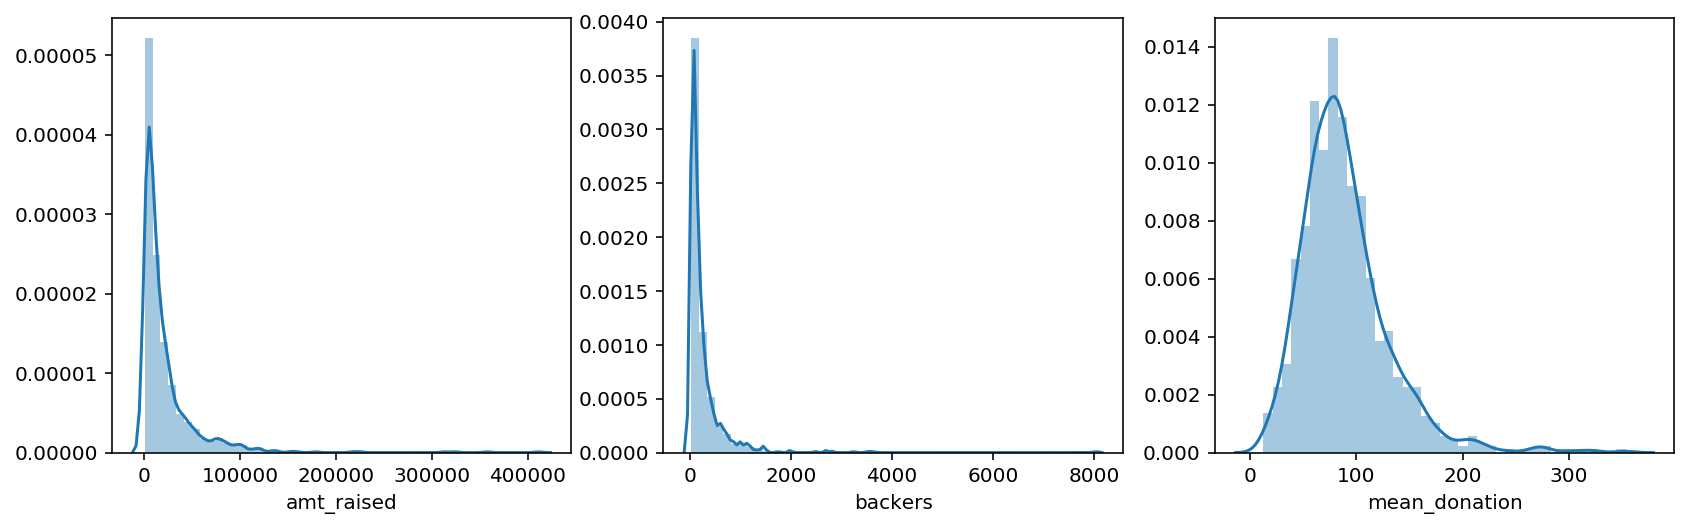

In [7]:
plt.subplots(figsize=(14,4))

plt.subplot(131)
sns.distplot(df['amt_raised'])
plt.subplot(132)
sns.distplot(df['backers'])
plt.subplot(133)
sns.distplot(df['mean_donation'])

In [8]:
df['status'] = (df['amt_raised'] / df['goal'] >= 1)
'Successful: ', (df['status']).mean()

('Successful: ', 0.18595450049455983)

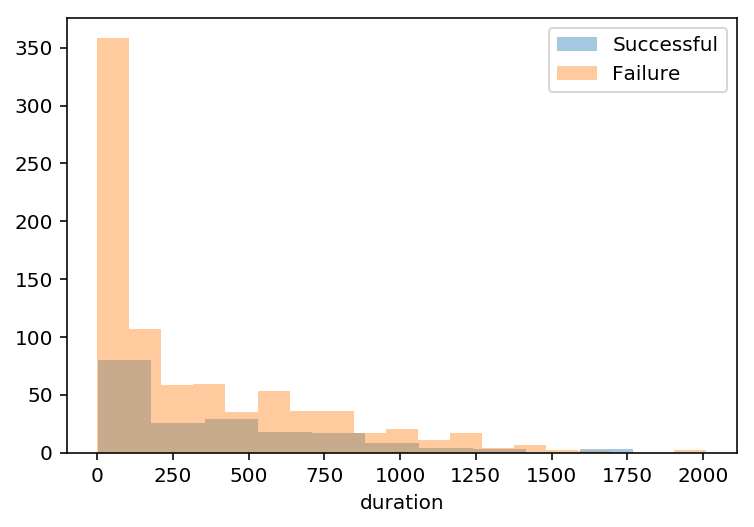

In [9]:
sns.distplot(df.loc[df['status'] == 1, 'duration'], kde=False, label='Successful')
sns.distplot(df.loc[df['status'] == 0, 'duration'], kde=False, label='Failure')
plt.legend();

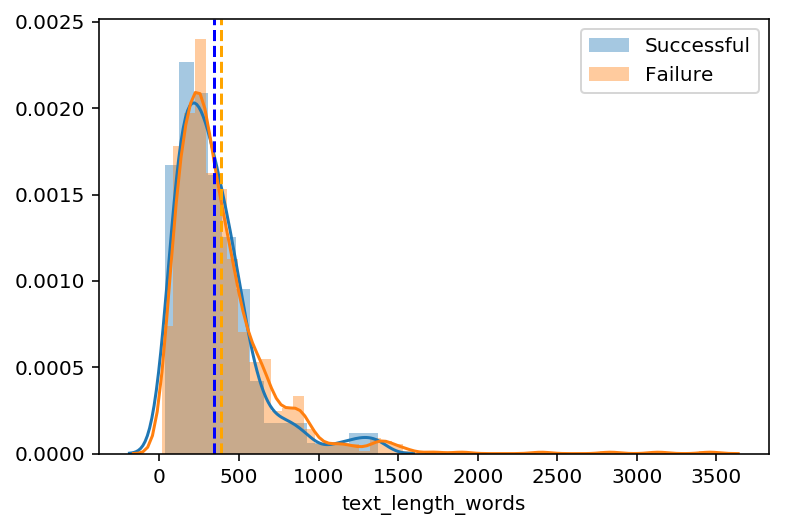

In [10]:
g = sns.distplot(df.loc[df['status'] == 1, 'text_length_words'], label='Successful')
sns.distplot(df.loc[df['status'] == 0, 'text_length_words'], label='Failure')
g.axvline(df.loc[df['status'] == 1, 'text_length_words'].mean(), c='blue', linestyle='--')
g.axvline(df.loc[df['status'] == 0, 'text_length_words'].mean(), c='orange', linestyle='--')
plt.legend();

In [11]:
df.groupby('status')['goal'].mean(), df.groupby('status')['goal'].quantile(0.5)

(status
 False    45652.356015
 True     19202.595745
 Name: goal, dtype: float64, status
 False    25000.0
 True     10000.0
 Name: goal, dtype: float64)

Mean donation is a bit less left skewed, more small values

No definite ending period, so projects are much longer too: some over 1500 days

Most projects (30%) are concentrated in January - could be a sampling error (the search results are the most recently updated)

Most projects were also launched in 2018

Seems like the word count distributions are similar to Kickstarter projects

No such thing as staff pick projects

No categories either, seems like most are "donate to relieve the medical expenses" or "donate to help this person live their last days well"

